# Configurações iniciais

In [ ]:
#importar bibliotecas
import pandas as pd #trabalhar com dataframes


In [ ]:
#conectar ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#com o arquivo de dados já no Drive
#fazer a leitura para o dataframe
#nesse exemplo é a base https://archive.ics.uci.edu/ml/datasets/Student+Performance#
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student-mat.csv", sep=';')

# Pré-processamento


In [ ]:
#excluir as colunas que não forem necessárias
df.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [ ]:
colunas_selecionadas = ['sex', 'age', 'Medu', 'Fedu', 'G3']

In [ ]:
df = df.filter(items=colunas_selecionadas)

In [ ]:
#a coluna G3 que apresenta a nota final será a coluna de classe.
#Serão criados intervalos para as notas
df.G3.describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [ ]:
df.G3.value_counts().sort_values(ascending=False)

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [ ]:
for i in df['G3']:
  try:
    a = int(i)
    if a <= 8:
      df.G3 = df.G3.replace(i, "1")
    elif a <= 11:
      df.G3 = df.G3.replace(i, "2")
    elif a<=14:
        df.G3 = df.G3.replace(i, "3")
    else:
        df.G3 = df.G3.replace(i, "4")
  except:
    pass

In [ ]:
df.G3.value_counts().sort_values(ascending=False)

2    131
1    102
3     89
4     73
Name: G3, dtype: int64

In [ ]:
#criar categoria para idade também
df.age.describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [ ]:
df.age.value_counts().sort_values(ascending=False)

16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

In [ ]:
for i in df['age']:
  try:
    a = int(i)
    if a <= 17:
      df.age = df.age.replace(i, "1")
    else:
      df.age = df.age.replace(i, "2")
  except:
    pass

In [ ]:
df.age.value_counts().sort_values(ascending=False)

1    284
2    111
Name: age, dtype: int64

In [ ]:
#transformação de textos em números na coluna sex
def change_sex(x):
  if x == "F":
    x = "1"    
  else:
    x = "2"
  return x

In [ ]:
df.sex = df.sex.apply(change_sex)

In [ ]:
df.sex.value_counts().sort_values(ascending=False)

1    208
2    187
Name: sex, dtype: int64

# Preparação para classificação

In [ ]:
#Separar a coluna que guarda a classe dos outros recursos
#coluna que é a classe / alvo
y = df["G3"]

In [ ]:
#Outros atributos
X = df.drop(columns=["G3"])

In [ ]:
print("Dataframe",df.shape)
print("Atributos",X.shape)
print("Classe",y.shape)

Dataframe (395, 5)
Atributos (395, 4)
Classe (395,)


In [ ]:
#Quebra o X e o y em 2 partes= treinamento e teste. O 0.20 indica que 20% será para teste.
#y_train e y_teste são uma série do pandas, por isso não apresentam a quantidade de colunas
#uma série é uma estrutura de dados de uma única coluna, e um data frame é um conjunto de séries
#o parametro random_sate define o quanto se deve embaralhar os dados antes de fazer a divisão, como é aleatório a cada treinamento pode-se chegar a resultados diferentes
#o parâmetro stratify define que a divisão dos dados deve manter a mesma proporção de y
from sklearn.model_selection import train_test_split #fazer a divisão de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=22,stratify=y)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (316, 4)
X_test (79, 4)
y_train (316,)
y_test (79,)


In [ ]:
#o par X_train e y_train possuem os atributos e as classes que cada tupla possui, serão usados para treinar o modelo
#o par X_teste e y_test possuem a mesma combinação. O modelo treinado será aplicado ao X_teste e será feita a comparação dos resultados com o que já se tem em y_test
#CrossValidation

# KNN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
resultado = knn.predict(X_test)
resultado

array(['2', '4', '2', '2', '2', '2', '1', '2', '2', '1', '2', '2', '2',
       '1', '3', '2', '2', '1', '1', '3', '4', '1', '1', '2', '1', '2',
       '2', '3', '2', '1', '3', '2', '2', '1', '3', '2', '2', '2', '4',
       '3', '1', '2', '1', '1', '2', '1', '2', '3', '1', '1', '1', '3',
       '1', '3', '1', '1', '4', '2', '2', '2', '3', '1', '1', '2', '1',
       '1', '1', '2', '2', '1', '1', '3', '2', '1', '4', '3', '1', '4',
       '3'], dtype=object)

In [ ]:
df["Qualidade da predição"] = knn.predict(X)
df.sample(15,random_state=22)

,sex,age,Medu,Fedu,G3,Qualidade da predição
164,2,1,1,1,1,1
188,1,1,3,3,2,2
303,1,1,3,2,4,1
339,1,1,3,2,2,1
236,2,1,2,2,3,3
268,2,2,4,2,2,1
56,1,1,4,3,4,1
197,2,1,3,3,2,1
42,2,1,4,4,4,2
281,2,1,3,2,2,1


In [ ]:
#fazer a predição de um exemplo
#o parâmetro tem que ser no formato de uma matriz/dataframe
print(knn.predict([[1,1,3,3]]))

['2']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Avaliação do Knn




In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2   3  4  All
Real                       
1         8   6   3  3   20
2        10   9   5  2   26
3         7   8   2  1   18
4         4   8   3  0   15
All      29  31  13  6   79


In [ ]:
#relatório de métricas, para cada classe é apresentada a precisão, recall, f1score e o suporte
#o suporte é o número de ocorrencias de cada classe no conjunto y_true
#macro avg e weighted avg indicam a média de cada medida não ponderada e a média ponderada pelo suporte respectivamente
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       0.28      0.40      0.33        20
           2       0.29      0.35      0.32        26
           3       0.15      0.11      0.13        18
           4       0.00      0.00      0.00        15

    accuracy                           0.24        79
   macro avg       0.18      0.21      0.19        79
weighted avg       0.20      0.24      0.22        79



In [ ]:
#Otimizando o parâmetro k utilizando o GridSearch
from sklearn.model_selection import GridSearchCV
k_list = list(range(1,31))
parametros = dict(n_neighbors=k_list)
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')
#cv é cross validation

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [ ]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 20} com o valor de acurácia 0.33844246031746034 


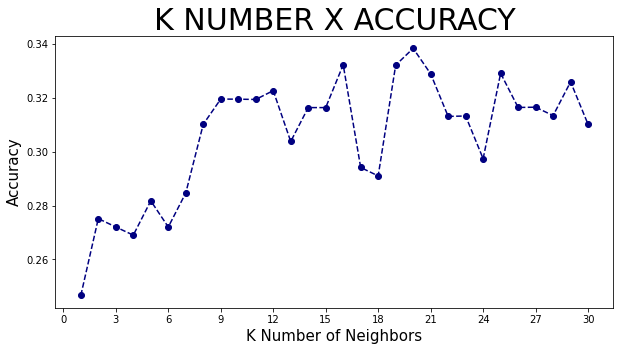

In [ ]:
#gráfico da acurácia em relação ao número de vizinhos
import matplotlib.pyplot as plt
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,31,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

# Árvore de decisão

In [ ]:
#importando um algoritmo de classificação: árvore de decisão
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
#declarar tree como o algoritmo
clf = tree.DecisionTreeClassifier()

In [ ]:
#treinar o algoritmo com a base de treinamento
clf = clf.fit(X_train, y_train)

In [ ]:
#Features mais importantes
for feature,importancia in zip(df.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sex:0.19325573223078188
age:0.07479192734358475
Medu:0.262064574886767
Fedu:0.4698877655388664


In [ ]:
resultado = clf.predict(X_test)
resultado

array(['2', '3', '2', '1', '1', '2', '2', '4', '1', '1', '2', '2', '2',
       '1', '3', '2', '2', '2', '2', '2', '3', '3', '1', '4', '1', '2',
       '4', '2', '2', '4', '2', '2', '4', '2', '2', '2', '2', '3', '3',
       '2', '3', '2', '3', '2', '3', '2', '2', '3', '2', '4', '2', '1',
       '3', '2', '1', '1', '3', '1', '4', '2', '2', '1', '2', '1', '2',
       '1', '1', '2', '4', '1', '4', '2', '4', '4', '3', '2', '1', '3',
       '3'], dtype=object)

In [ ]:
df["Qualidade da predição"] = clf.predict(X)
df.sample(15,random_state=22)

,sex,age,Medu,Fedu,G3,Qualidade da predição
164,2,1,1,1,1,1
188,1,1,3,3,2,2
303,1,1,3,2,4,1
339,1,1,3,2,2,1
236,2,1,2,2,3,2
268,2,2,4,2,2,1
56,1,1,4,3,4,4
197,2,1,3,3,2,2
42,2,1,4,4,4,4
281,2,1,3,2,2,2


In [ ]:
#fazer a predição de um exemplo
#o parâmetro tem que ser no formato de uma matriz/dataframe
print(clf.predict([[1,1,3,3]]))

['2']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


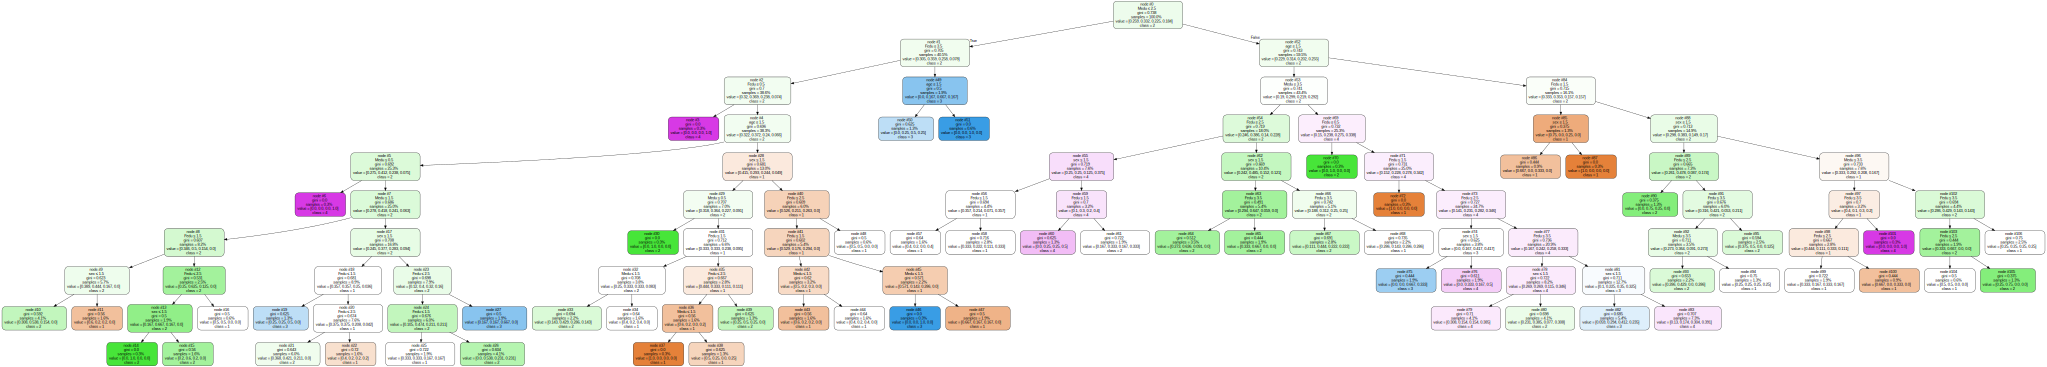

In [ ]:
#plotar a árvore de decisão
import pydot
import graphviz

dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names = df.drop(columns=['G3','Qualidade da predição']).columns,
         class_names=['1','2','3','4'],  #colocar as classes do teu modelo
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source


# feature labels
features_label = df.drop(columns=['G3','Qualidade da predição'],axis=1).columns

# class label
class_label = ['1','2','3','4']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Avaliação da Árvore de decisão

In [ ]:
#matriz de confusão
print (pd.crosstab(y_test,resultado, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   1   2   3   4  All
Real                        
1         9   7   4   0   20
2         3  15   7   1   26
3         3   7   2   6   18
4         2   7   2   4   15
All      17  36  15  11   79


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           1       0.53      0.45      0.49        20
           2       0.42      0.58      0.48        26
           3       0.13      0.11      0.12        18
           4       0.36      0.27      0.31        15

    accuracy                           0.38        79
   macro avg       0.36      0.35      0.35        79
weighted avg       0.37      0.38      0.37        79



#Comparação dos modelos

In [ ]:
#avaliar o modelo criado, o modelo fará a predição dos valores em X e a resposta será comparada com o que está em y
#quanto maior de 1 melhor o resultado
#abaixo de 0,5 é muito ruim
#faz um teste com a própria base de treinamento e com a de teste para comparação
#o .score indica a acurácia do modelo
print("Árvore de decisão: Treinamento - ",clf.score(X_train,y_train),", Teste - ",clf.score(X_test,y_test))
print("Knn:               Treinamento - ",knn.score(X_train,y_train),", Teste - ",knn.score(X_test,y_test))

Árvore de decisão: Treinamento -  0.4873417721518987 , Teste -  0.379746835443038
Knn:               Treinamento -  0.370253164556962 , Teste -  0.24050632911392406
